In [1]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.linear_model import LinearRegression

In [2]:
def f(x):
    return x * np.cos(x) + np.random.normal(size=500)*2

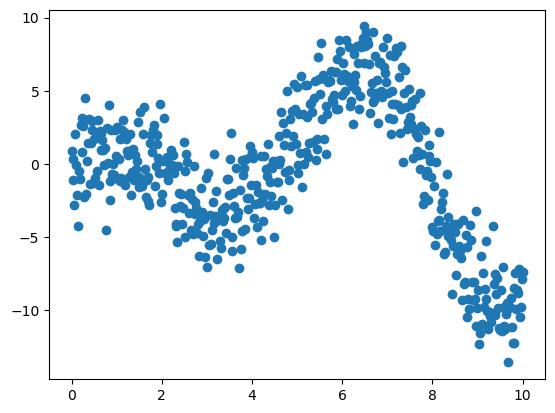

In [8]:
x = np.linspace(0, 10, 500)
y = f(x)

plt.scatter(x, y)

In [21]:
x = x.reshape(x.shape[0], 1)

In [58]:
# augmentation des degrés du polynome
x_augmented = np.concatenate((x**2, x), axis=1)
x_augmented = np.concatenate((x**3, x_augmented), axis=1)
x_augmented = np.concatenate((x**4, x_augmented), axis=1)
x_augmented = np.concatenate((x**5, x_augmented), axis=1)

In [59]:
# creation du modèle

model = LinearRegression()

model.fit(x_augmented, y)

model.score(x_augmented, y)

0.8286054624536375

In [60]:
# equation du modele 

equ_model = x_augmented.dot(model.coef_) + model.intercept_

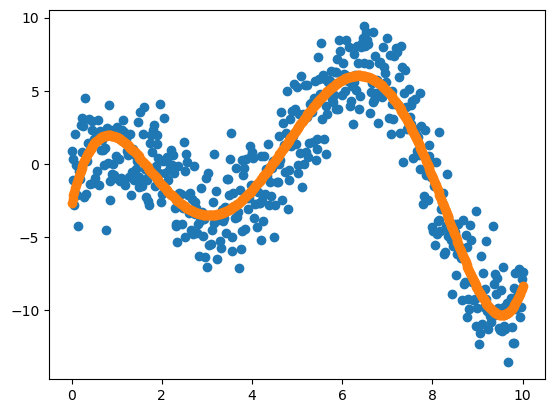

In [61]:
plt.scatter(x, y)

plt.scatter(x, model.predict(x_augmented))

#plt.scatter(x, equ_model)

## ACP à noyau, Kernel trick

Un noyau en machine learning est une fonction mathématique qui va transformer les données pour capturer les relations complexes qui les composent.

Par exemple en les projetant dans un espace de caractéristiques plus élevé (transformation polynomiale).

In [73]:
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA

In [88]:
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

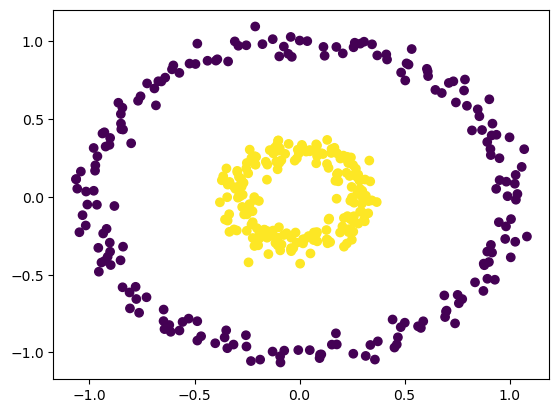

In [89]:
plt.scatter(X[:,0], X[:,1], c=y)

In [97]:
kpca = KernelPCA(n_components=3, kernel="rbf", fit_inverse_transform=True, gamma=10)

X_transform = kpca.fit_transform(X)

In [98]:
X_transform.shape

(400, 3)

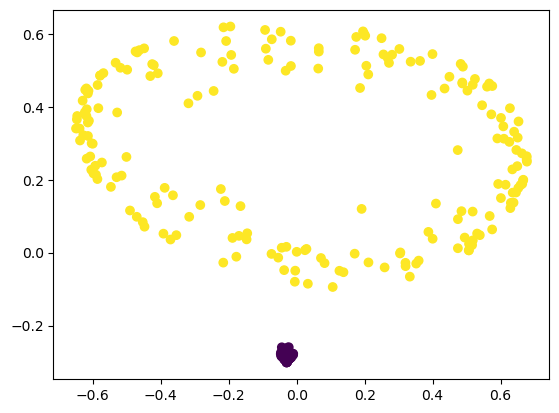

In [99]:
plt.scatter(X_transform[:,0], X_transform[:,1], c=y)

## MDS et Isomap
Variété qui favorise la structure globale, la distance entre les points est conservée

Algorithme de réduction de dimensions.

Conserve la distance entre les points, va chercher à minimiser la différence de distance entre les points dans l'espace initial et dans l'espace projeté.

De base, la distance entre les points est la distance euclidienne, l'algo devient plus intéressant quand on calcule la distance géodésique, c'est l'algo ISOMAP.

distance géodésique : somme de petite distance euclidienne sur une variété, c'est à dire dans un espace non linéaire

Isomap :
- Graph des plus proches voisins
- Relier les points au plus cours en passant par le graph des plus proches voisins
- Effectuer l'algorithme du MDS sur ces distance

## LLE et t-SNE
Variété qui favorise la structure locale, (les points proches sont pondérés avec plus d'importance)

perplexité : nombre de voisins à prendre en compte

perplexité entre 5 et 50 à tester